# Hands-On Exercise 6.1:
# Working with Logistic Regression in Python
***

## Objectives

#### In this exercise, you will work with logistic regression using Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how logistic regression models can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called Adult that you will import from a csv file. You will:<br>
● Review the data within the data set and transform it into a format suitable for use in logistic regression<br>
● Examine the predictor variables<br>
● Train a logistic regression model that can be used to make future predictions<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

1. ❏ Import **pandas** and **numpy**

In [2]:
import pandas as pd
import numpy as np

2. ❏ Read in the **Adult.csv** dataset into a dataframe and preview it

In [3]:
data = pd.read_csv("Adult.csv")

3. ❏ Check if there are any missing values in each column of the columns

In [17]:
print(data.isnull().sum())

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64


In [60]:
print(data.isnull().any())

AGE                         False
WORKCLASS                   False
FNLWGT                      False
EDUCATION                   False
EDUCATIONNUM                False
MARITALSTATUS               False
OCCUPATION                  False
RELATIONSHIP                False
RACE                        False
SEX                         False
CAPITALGAIN                 False
CAPITALLOSS                 False
HOURSPERWEEK                False
NATIVECOUNTRY               False
ABOVE50K                    False
RELATIONSHIP_NotInFamily    False
dtype: bool


4. ❏ Check how many different values there are for each feature

In [61]:
data.nunique()

AGE                            73
WORKCLASS                       9
FNLWGT                      21648
EDUCATION                      16
EDUCATIONNUM                   16
MARITALSTATUS                   7
OCCUPATION                     15
RELATIONSHIP                    6
RACE                            5
SEX                             2
CAPITALGAIN                   119
CAPITALLOSS                    92
HOURSPERWEEK                   94
NATIVECOUNTRY                  42
ABOVE50K                        2
RELATIONSHIP_NotInFamily        1
dtype: int64

5. ❏ Examine the structure of the dataset using the **.shape, .columns and .dtypes** attributes

In [18]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(32561, 15)
Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATIONNUM',
       'MARITALSTATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITALGAIN', 'CAPITALLOSS', 'HOURSPERWEEK', 'NATIVECOUNTRY',
       'ABOVE50K'],
      dtype='object')
AGE               int64
WORKCLASS        object
FNLWGT            int64
EDUCATION        object
EDUCATIONNUM      int64
MARITALSTATUS    object
OCCUPATION       object
RELATIONSHIP     object
RACE             object
SEX              object
CAPITALGAIN       int64
CAPITALLOSS       int64
HOURSPERWEEK      int64
NATIVECOUNTRY    object
ABOVE50K          int64
dtype: object


6a. ❏ Preview and dummy code the **RELATIONSHIP** variable

In [19]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [26]:
rel = pd.get_dummies(data.RELATIONSHIP, drop_first=True)
rel

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,0
32558,0,0,0,1,0
32559,0,0,1,0,0


6b. ❏ Preview and dummy code the **OCCUPATION** variable

In [25]:
data.OCCUPATION.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [27]:
occ = pd.get_dummies(data.OCCUPATION, drop_first=True)
occ

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,0,0,1,0
32557,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32558,1,0,0,0,0,0,0,0,0,0,0,0,0,0
32559,1,0,0,0,0,0,0,0,0,0,0,0,0,0


7. ❏ Join these two dummy coded variables to **'AGE', 'CAPITALGAIN',
'EDUCATIONNUM'** to make up the predictor variable dataset

In [31]:
X = data[["AGE", "CAPITALGAIN", "EDUCATIONNUM"]].join(rel).join(occ)
X

,AGE,CAPITALGAIN,EDUCATIONNUM,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Adm-clerical,Armed-Forces,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,2174,13,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,9,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0,7,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0,13,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,40,0,9,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,58,0,9,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,0,9,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


8. ❏ Create a target variable dataframe containing **'ABOVE50K'**

In [33]:
y = data.ABOVE50K
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: ABOVE50K, Length: 32561, dtype: int64

9. ❏ Split target and predictor variables into training and test datasets using the **train_test_split** library from **sklearn.model_selection**

In [30]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

10. ❏ Import the **LogisticRegression** library from **sklearn.linear_model**

In [35]:
from sklearn.linear_model import LogisticRegression

11. ❏ Instantiate the logistic regression model

In [40]:
lr = LogisticRegression(random_state=0)

12. ❏ Train the model on the data

In [41]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

13. ❏ Examine the coefficients produced by the model

In [62]:
# lr.get_params()
lr.coef_

array([[ 1.78052280e-02,  3.03872237e-04,  2.56467262e-01,
        -2.11818030e+00, -1.45258689e+00, -3.72667618e+00,
        -2.80083140e+00,  3.46215881e-01, -1.53193841e-01,
        -9.56829574e-03, -9.26582114e-02,  8.43709643e-01,
        -8.30637756e-01, -8.80986316e-01, -6.45115565e-01,
        -1.57832237e+00, -1.76079668e-01,  4.22525066e-01,
         3.17498105e-01,  2.95752387e-01,  4.73557825e-01,
        -1.94132484e-01]])

14. ❏ Use the model to make predictions for the test dataset

In [63]:
pred = lr.predict(X_test)
pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

15. ❏ Use the **score()** method to get the accuracy of the model

In [45]:
lr.score(X_test, y_test)

0.8468247144085493

16. ❏ Calculate the **Mean Square Error (MSE)**

In [56]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, confusion_matrix, RocCurveDisplay

In [48]:
mean_squared_error(y_test, pred)

0.1531752855914507

17. ❏ Import **confusion_matrix** from **sklearn.metrics**

18. ❏ Create and display a **confusion matrix**

In [51]:
confusion_matrix(y_test, pred)

array([[5780,  434],
       [ 813, 1114]], dtype=int64)

19. ❏ Import **roc_auc_score** and **roc_curve** from **sklearn.metrics**

20. ❏ Calculate the **auc score**

In [65]:
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print(roc_auc_score(y_test, lr.predict(X_test)))

0.8944065821205911
0.7541291915120769


21. ❏ Import **matplotlib.pyplot**

In [54]:
import matplotlib.pyplot as plt

22. ❏ Calculate **false positive rates, true positive rates**, and **thresholds** using the **roc_curve()** function and plot them 

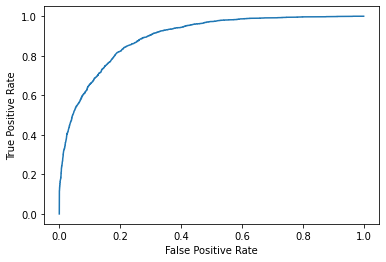

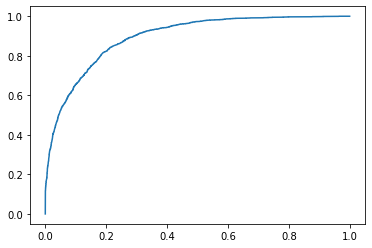

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.figure()
plt.plot(fpr, tpr)

In [59]:
roc_curve(y_test, pred, pos_label=lr.classes_[1])

(array([0.        , 0.06984229, 1.        ]),
 array([0.        , 0.57810067, 1.        ]),
 array([2, 1, 0], dtype=int64))

## <center>**Congratulations! You have completed the exercise.**</center>

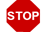

# <center>**This is the end of the exercise.**</center>